## Extracting zip folder

In [1]:
!unzip '/content/Flowers-Dataset.zip'

Archive:  /content/Flowers-Dataset.zip
  inflating: flowers/daisy/10140303196_b88d3d6cec.jpg  
  inflating: flowers/daisy/10172379554_b296050f82_n.jpg  
  inflating: flowers/daisy/10172567486_2748826a8b.jpg  
  inflating: flowers/daisy/10172636503_21bededa75_n.jpg  
  inflating: flowers/daisy/10300722094_28fa978807_n.jpg  
  inflating: flowers/daisy/10391248763_1d16681106_n.jpg  
  inflating: flowers/daisy/10437754174_22ec990b77_m.jpg  
  inflating: flowers/daisy/10437770546_8bb6f7bdd3_m.jpg  
  inflating: flowers/daisy/10437929963_bc13eebe0c.jpg  
  inflating: flowers/daisy/10466290366_cc72e33532.jpg  
  inflating: flowers/daisy/10466558316_a7198b87e2.jpg  
  inflating: flowers/daisy/10555749515_13a12a026e.jpg  
  inflating: flowers/daisy/10555815624_dc211569b0.jpg  
  inflating: flowers/daisy/10555826524_423eb8bf71_n.jpg  
  inflating: flowers/daisy/10559679065_50d2b16f6d.jpg  
  inflating: flowers/daisy/10712722853_5632165b04.jpg  
  inflating: flowers/daisy/10770585085_4742b9dac3_n

# Image Augmentation

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
flowers_datagram = ImageDataGenerator(rescale=1./255,
                                      zoom_range=0.2,
                                      horizontal_flip=True)

In [4]:
flowers_datagram = ImageDataGenerator(rescale=1./255)

In [5]:
xflowers = flowers_datagram.flow_from_directory('/content/flowers',
                                                target_size=(64,64),
                                                class_mode='categorical',
                                                batch_size=100)

Found 3609 images belonging to 5 classes.


# Create Model

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense

# Add Layers

In [7]:
model = Sequential()
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(64,64,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(300,activation='relu'))
model.add(Dense(150,activation='relu'))
model.add(Dense(5,activation='softmax'))

# compile Model

In [8]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

# Fit the Model

In [9]:
model.fit_generator(xflowers,
                    steps_per_epoch=len(xflowers),
                    epochs=20,
                    validation_data=xflowers,
                    validation_steps=len(xflowers),)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


Epoch 1/20
37/37 [==============================] - 32s 837ms/step - loss: 1.9394 - accuracy: 0.3671 - val_loss: 1.1480 - val_accuracy: 0.5231
Epoch 2/20
37/37 [==============================] - 30s 825ms/step - loss: 1.0775 - accuracy: 0.5658 - val_loss: 0.9470 - val_accuracy: 0.6403
Epoch 3/20
37/37 [==============================] - 30s 826ms/step - loss: 0.9306 - accuracy: 0.6459 - val_loss: 0.7868 - val_accuracy: 0.7296
Epoch 4/20
37/37 [==============================] - 31s 830ms/step - loss: 0.7891 - accuracy: 0.7027 - val_loss: 0.6598 - val_accuracy: 0.7869
Epoch 5/20
37/37 [==============================] - 32s 858ms/step - loss: 0.6325 - accuracy: 0.7922 - val_loss: 0.4931 - val_accuracy: 0.8495
Epoch 6/20
37/37 [==============================] - 31s 831ms/step - loss: 0.4840 - accuracy: 0.8509 - val_loss: 0.3956 - val_accuracy: 0.8775
Epoch 7/20
37/37 [==============================] - 31s 825ms/step - loss: 0.3832 - accuracy: 0.8864 - val_loss: 0.2838 - val_accuracy: 0.9318

# Save Model

In [11]:
model.save('flowers.h5')

# Testing Model

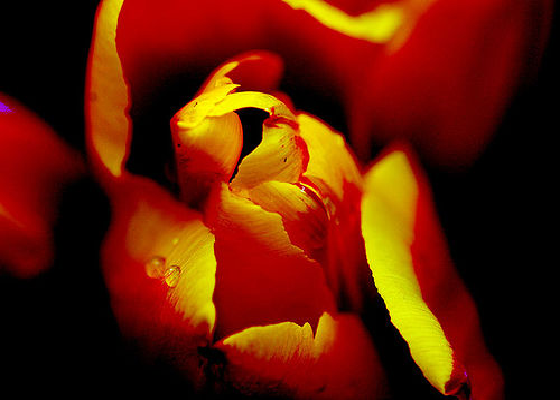

In [12]:
from tensorflow.keras.preprocessing import image
img = image.load_img('/content/flowers/tulip/10791227_7168491604.jpg',target_size=(400,560))
img

In [13]:
from tensorflow.keras.preprocessing import image
img = image.load_img('/content/flowers/tulip/10791227_7168491604.jpg',target_size=(400,560))
x= image.img_to_array(img)
x

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [2., 0., 1.],
        [2., 0., 1.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [2., 0., 1.],
        [2., 0., 1.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [2., 0., 1.],
        [2., 0., 1.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)